## ASL Recognition

### Exploratory Analysis

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import helperFunctions as hf
import edaFunctions as ef

In [2]:
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/C-UDA-0.1_annotated_discussion.pdf
../data/MSASL_classes.json
../data/MSASL_synonym.json
../data/MSASL_test.json
../data/MSASL_train.json
../data/MSASL_val.json
../data/README.md
../data/videos\0\cropped_frame_0.png
../data/videos\0\cropped_frame_1.png
../data/videos\0\cropped_frame_10.png
../data/videos\0\cropped_frame_11.png
../data/videos\0\cropped_frame_12.png
../data/videos\0\cropped_frame_13.png
../data/videos\0\cropped_frame_14.png
../data/videos\0\cropped_frame_15.png
../data/videos\0\cropped_frame_16.png
../data/videos\0\cropped_frame_17.png
../data/videos\0\cropped_frame_18.png
../data/videos\0\cropped_frame_19.png
../data/videos\0\cropped_frame_2.png
../data/videos\0\cropped_frame_20.png
../data/videos\0\cropped_frame_21.png
../data/videos\0\cropped_frame_22.png
../data/videos\0\cropped_frame_23.png
../data/videos\0\cropped_frame_24.png
../data/videos\0\cropped_frame_25.png
../data/videos\0\cropped_frame_26.png
../data/videos\0\cropped_frame_27.png
../data/videos\0\c

In [3]:
df = pd.read_json(r'D:\ML Projects\asl-recognition-with-dl\model\data\MSASL_train.json')

In [4]:
train_df = df.loc[0:10,:]

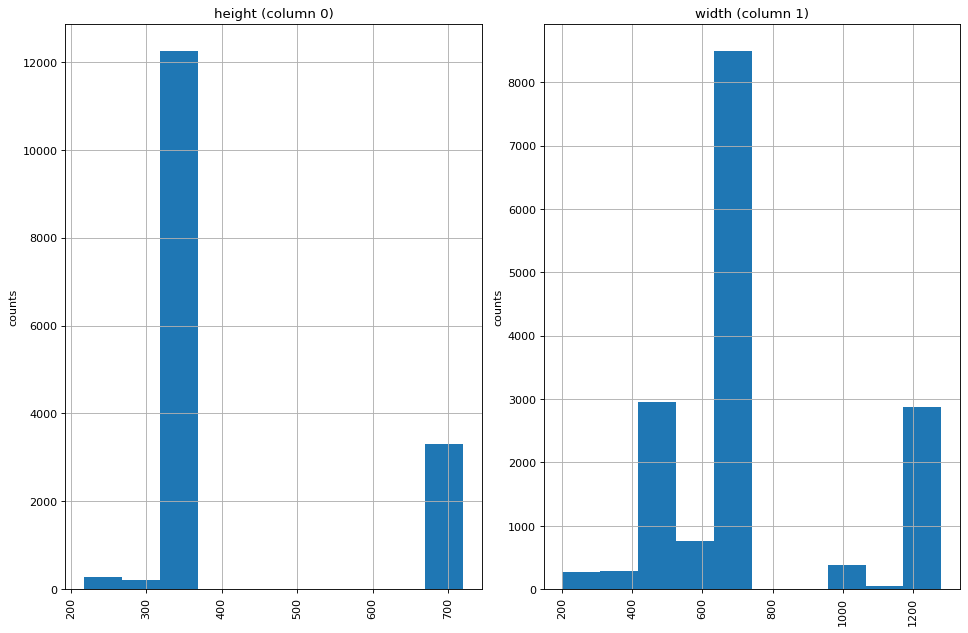

In [5]:
ef.plotPerColumnDistribution(df, 30, 10)

In [6]:
# hf.download_video(0, train_df.loc[0,'url'])
# filename = '..\\data\\videos\\' + 'videos_0'
# YouTube(train_df.loc[0,'url']).streams.first().download(filename)
dir = '..\\data\\videos\\' + '0'
url = train_df.loc[0,'url']
filepath = hf.download_video(dir, url)
train_df.loc[0,'file_path'] = filepath
hf.extract_and_save_cropped_frames(train_df.loc[0,'start'], train_df.loc[0,'end'], train_df.loc[0,'box'], train_df.loc[0,'file_path'], dir)

C:\Users\danie\AppData\Local\Temp\ipykernel_1112\2966899798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[0,'file_path'] = filepath


In [7]:
train_df

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review,file_path
0,match [light-a-MATCH],match,0.000,0,0,0,83,match light-a-MATCH,830,360,30.000,2.767,https://www.youtube.com/watch?v=C37R_Ix8-qs,match,"[0.057544618844985004, 0.21637457609176602, 1....",640,NaN,d:\ML Projects\asl-recognition-with-dl\model\s...
1,FAIL,fail,0.000,0,-1,0,74,FAIL,542,360,25.000,2.960,https://www.youtube.com/watch?v=PIsUJl8BN_I,fail,"[0.06577941775321901, 0.167171776294708, 0.939...",480,NaN,NaN
2,laugh,laugh,0.000,4,26,0,31,SignSchool Laugh with Legs 2,312,360,29.970,1.034,www.youtube.com/watch?v=9FdHlMOnVjg,laugh,"[0.131885945796966, 0.32334136962890603, 1.0, ...",640,NaN,NaN
3,BOOK,book,0.000,0,-1,0,66,BOOK(3),38,360,25.000,2.640,https://www.youtube.com/watch?v=J7tP98oDxqE,book,"[0.055698871612548, 0.25173279643058705, 0.996...",480,NaN,NaN
4,sign-language,sign language,0.000,0,-1,0,75,SIGN-LANGUAGE-S-CLAW-F,848,360,29.970,2.502,www.youtube.com/watch?v=N2mG9ZKjrGA,sign language,"[0.039043992757797005, 0.24198183417320202, 1....",640,NaN,NaN
5,school,school,1.101,1,44,33,110,ASL Vocabulary school,10,360,29.970,3.670,https://www.youtube.com/watch?v=1AyT77LqJzQ,school,"[0.0, 0.07651948928833001, 1.0, 1.0]",640,1.0,NaN
6,school,school,4.671,1,44,140,206,ASL Vocabulary school,10,360,29.970,6.874,https://www.youtube.com/watch?v=1AyT77LqJzQ,school,"[0.0, 0.07651948928833001, 1.0, 1.0]",640,1.0,NaN
7,easter,easter,0.000,2,58,0,116,Easter,794,360,29.595,3.920,https://www.youtube.com/watch?v=SVWABYmFdhs,easter,"[0.0, 0.12271708250045701, 1.0, 0.85962688922882]",640,NaN,NaN
8,Boring,boring,0.000,13,-1,0,71,ASL Boring,46,360,25.000,2.840,https://www.youtube.com/watch?v=CYx7qm62Zwo,bored,"[0.05692723393440201, 0.26684892177581704, 0.9...",640,NaN,NaN
9,PAST,past,0.000,191,13,0,32,PAST,510,720,29.970,1.068,https://www.youtube.com/watch?v=cJOyCgIKyeA,past,"[0.06102180480957001, 0.29153227806091303, 0.9...",1280,NaN,NaN
